<a href="https://colab.research.google.com/github/Faszas/Multi-class-classification-with-MNIST-handwritter/blob/master/Multi_class_classification_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
len(x_train)

60000

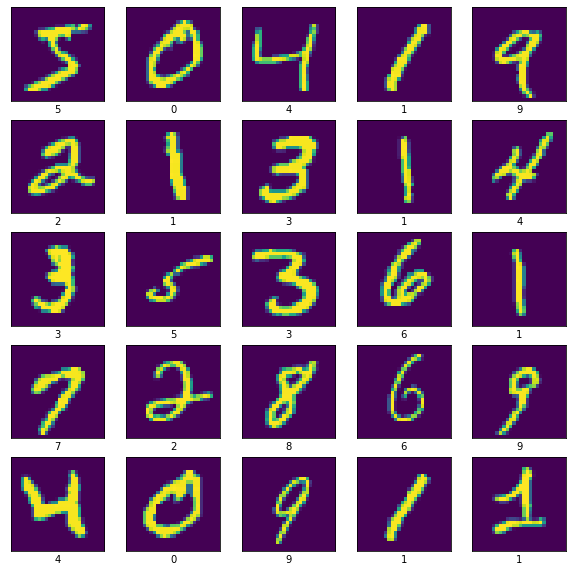

In [0]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i])
  plt.xticks([]), plt.yticks([])
  plt.xlabel(y_train[i])
plt.show()

In [0]:
def build_model(learning_rate):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(units=256, activation='relu'),
                                      tf.keras.layers.Dense(units=128, activation='relu'),
                                      tf.keras.layers.Dropout(rate=0.3),
                                      tf.keras.layers.Dense(units=10, activation='softmax')
  ])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy']
                )
  return model

def train_model(model, feature, label, epochs=10, batch_size=100, validation_split=0.2):
  history = model.fit(feature, label, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
  epoch = history.epoch
  hist = pd.DataFrame(history.history)
  return epoch, hist

def evaluate_model(model, x_test, y_test, batch_size):
  model.evaluate(x_test, y_test, batch_size)

In [0]:
model = build_model(0.001)
batch_size=1000
epoch, hist = train_model(model, x_train, y_train, epochs=100, batch_size=batch_size)

Epoch 1/100
48/48 [==============================] - 0s 5ms/step - loss: 12.9229 - accuracy: 0.6885 - val_loss: 1.0515 - val_accuracy: 0.8553
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 1.1916 - accuracy: 0.7524 - val_loss: 0.5892 - val_accuracy: 0.8574
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.8068 - val_loss: 0.4827 - val_accuracy: 0.8823
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.8424 - val_loss: 0.4324 - val_accuracy: 0.8978
Epoch 5/100
48/48 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.8567 - val_loss: 0.3973 - val_accuracy: 0.9066
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.8715 - val_loss: 0.3627 - val_accuracy: 0.9159
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8861 - val_loss: 0.3438 - val_accuracy: 0.9221
Epoch 8/100


In [0]:
evaluate_model(model, x_test, y_test, batch_size)

10/10 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.9724


In [0]:
model.predict(x_test)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 7.7225855e-34],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.6254136e-34, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.8383677e-28,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.6481081e-32],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [0]:
y_test[0]

7

In [0]:
np.argmax(model.predict(x_test)[0])

7

In [0]:
predictions = model.predict(x_test)

In [0]:
np.max(predictions[0])

1.0

In [0]:
def show_results_predict(img, predict, real):
  plt.xticks([]), plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  color = 'yellow' if np.argmax(predict) == real else 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predict),
                                100*np.max(predict),
                                real),
                                color=color)


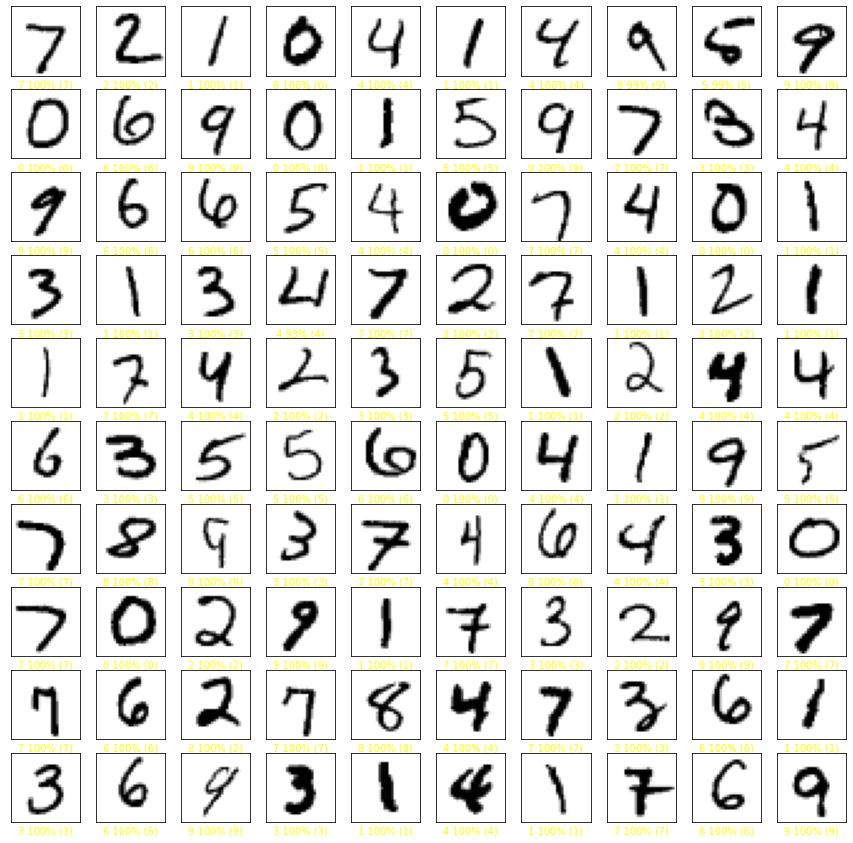

In [0]:
plt.figure(figsize=(15, 15))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    show_results_predict(x_test[i], predictions[i], y_test[i])

plt.show()

In [0]:
print(plt.xlabel)

<function xlabel at 0x7f47dd6592f0>
